***DESCRIPTIVE STATISTICS***

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

import yfinance as yf

In [59]:
stock = 'AAPL'
start = '2015-01-01'
end = '2025-01-01'

dataset = yf.download(stock, start, end)
dataset.columns = dataset.columns.get_level_values(0)
dataset.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
2015-01-05,23.604340,24.137520,23.417727,24.057543,257142000
2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000


In [60]:
dataset.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593094,252.889969,250.146586,251.623020,35557500
2024-12-31,249.817383,252.670501,248.829760,251.832526,39480700


In [61]:
sample = round(dataset['Close'], 2)
sample.tail()

Date
2024-12-24    257.58
2024-12-26    258.40
2024-12-27    254.97
2024-12-30    251.59
2024-12-31    249.82
Name: Close, dtype: float64

In [62]:
print('Sample Statistics:')
print('Sample Mean: ', sample.mean())
print('Sample Variance: ', sample.var())
print('Sample Standarad Deviation: ', sample.std())
print('Sample Median: ', np.median(sample))
print('Sample Mode: ', stats.mode(sample, keepdims=True).mode[0] )


Sample Statistics:
Sample Mean:  94.05671303656597
Sample Variance:  4300.614402750224
Sample Standarad Deviation:  65.5790698527375
Sample Median:  64.525
Sample Mode:  21.35


In [63]:
#percentiles

p = np.percentile(sample, 50)
print('Sample percentile of 50th: ', p)

Sample percentile of 50th:  64.525


In [64]:
#Quartiles

sample.quantile([0.25, 0.5, 0.75])

0.25     35.3000
0.50     64.5250
0.75    150.5525
Name: Close, dtype: float64

In [65]:
#range

print('Range: ', sample.max() - sample.min())

Range:  237.74999999999997


In [66]:
#interquartile range

from scipy.stats import iqr

print('Interquartile range (IQR): ', iqr(sample))

Interquartile range (IQR):  115.25250000000001


In [67]:
#harmonic mean

print('Sample Harmonic mean: ', stats.hmean(sample))

Sample Harmonic mean:  53.31305779330742


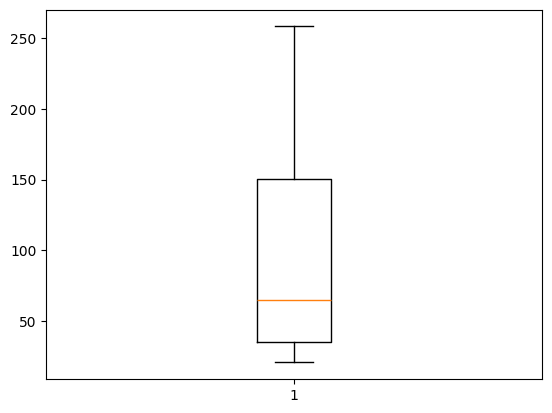

In [68]:
plt.boxplot(sample)
plt.show()

In [69]:
#calculate summary statistics
data_mean, data_std = sample.mean(), sample.std()

#identify outliers
cutoff = data_std * 3
lower, upper = data_mean - cutoff, data_mean + cutoff

#identify outliers
outliers = [x for x in sample if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

#remove outliers
outliers_removed = [x for x in sample if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 2516


In [70]:
q25, q75 = np.percentile(sample, 25), np.percentile(sample, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in sample if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in sample if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=35.300, 75th=150.553, IQR=115.253
Identified outliers: 0
Non-outlier observations: 2516


In [71]:
print('Skewness: ', sample.skew())

Skewness:  0.5030496614050551


In [72]:
print('Five_number Summary: ')
print(sample.describe())

Five_number Summary: 
count    2516.000000
mean       94.056713
std        65.579070
min        20.650000
25%        35.300000
50%        64.525000
75%       150.552500
max       258.400000
Name: Close, dtype: float64


In [73]:
print("Z-Score: ", stats.zscore(sample))

Z-Score:  [-1.06406788 -1.07459162 -1.0744391  ...  2.4542171   2.40266602
  2.37567033]


In [74]:
print('Coefficient of Variation: ', stats.variation(sample))

Coefficient of Variation:  0.6970904471801905


{'whiskers': [<matplotlib.lines.Line2D at 0x1bc2bf90b30>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc2bf92240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc2bf91bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc2bf92810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc2bf92a80>],
 'means': []}

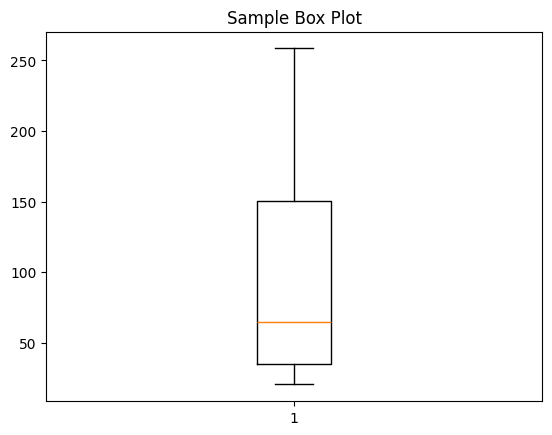

In [75]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sample Box Plot')
ax1.boxplot(sample)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc2f2a07d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc2f2a0d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc2f2a0530>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc2f2a11f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc2f2a14f0>],
 'means': []}

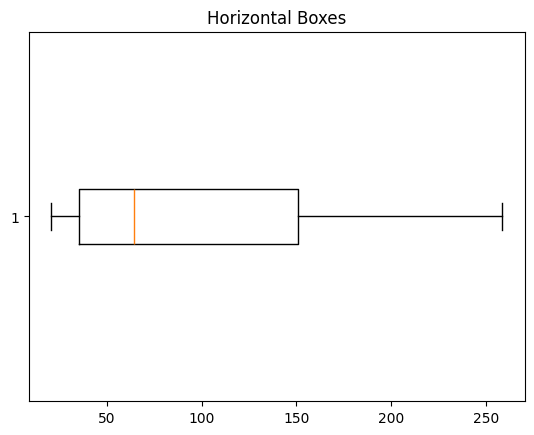

In [76]:
red_square = dict(markerfacecolor = 'r', marker  = 's')
fig2, ax2 = plt.subplots()
ax2.set_title('Horizontal Boxes')
ax2.boxplot(sample, vert = False, flierprops = red_square)

In [77]:
print('Empirical Rule: ')
final_list = [x for x in sample if (x > sample.mean() - 2*sample.std())]
final_list = [x for x in final_list if (x < sample.mean() + 2*sample.std())]
print(final_list)

Empirical Rule: 
[24.29, 23.6, 23.61, 23.94, 24.86, 24.88, 24.27, 24.49, 24.39, 23.73, 23.55, 24.15, 24.34, 24.97, 25.1, 25.13, 24.25, 25.62, 26.41, 26.03, 26.35, 26.36, 26.56, 26.75, 26.53, 26.7, 27.21, 27.85, 28.21, 28.34, 28.51, 28.71, 28.65, 28.88, 29.66, 29.48, 28.72, 29.09, 28.65, 28.79, 28.85, 28.67, 28.19, 28.24, 28.36, 27.77, 27.26, 27.76, 27.56, 27.87, 28.33, 28.65, 28.44, 28.08, 28.37, 28.26, 27.52, 27.71, 27.49, 28.18, 27.75, 27.71, 27.95, 28.4, 28.1, 28.01, 28.23, 28.35, 28.29, 28.17, 28.28, 28.14, 27.82, 28.46, 28.31, 28.69, 28.92, 29.06, 29.59, 29.12, 28.69, 27.91, 28.76, 28.7, 28.06, 27.88, 28.05, 28.58, 28.29, 28.19, 28.22, 28.88, 28.84, 29.16, 29.13, 29.13, 29.43, 29.68, 29.03, 29.57, 29.51, 29.18, 29.24, 29.11, 29.14, 28.97, 28.81, 28.62, 28.54, 28.86, 28.8, 28.48, 28.43, 28.58, 28.51, 28.64, 28.35, 28.58, 28.45, 28.69, 28.56, 28.39, 27.89, 28.09, 28.35, 28.32, 28.22, 28.15, 27.45, 26.89, 27.61, 28.14, 28.13, 28.4, 28.78, 29.03, 29.58, 29.28, 28.05, 28.03, 27.88, 27.

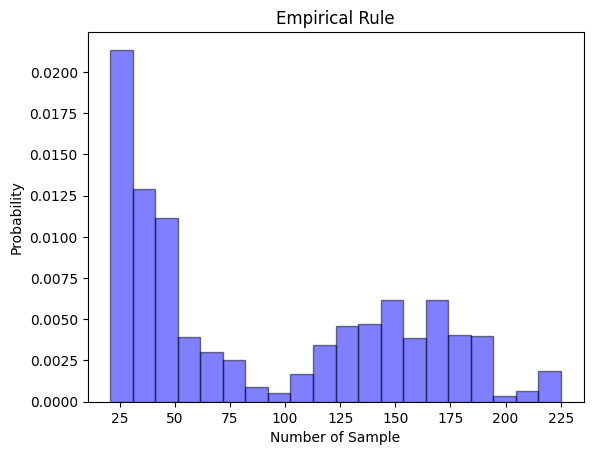

In [78]:
plt.hist(final_list, 20,
         density = True,
         histtype='bar',
         facecolor = 'b',
         edgecolor = 'k',
         alpha = 0.5)
plt.title ('Empirical Rule')
plt.xlabel('Number of Sample')
plt.ylabel('Probability')
plt.show()

Mean:  94.05671303656597 
Median:  64.525 
Mode:  21.35


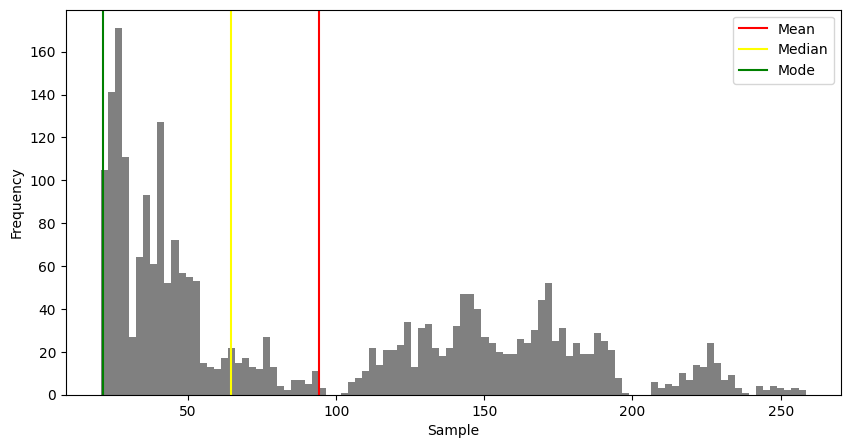

In [79]:
mean = sample.mean()
median = sample.median()
mode = sample.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(sample,bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.legend()
plt.show()

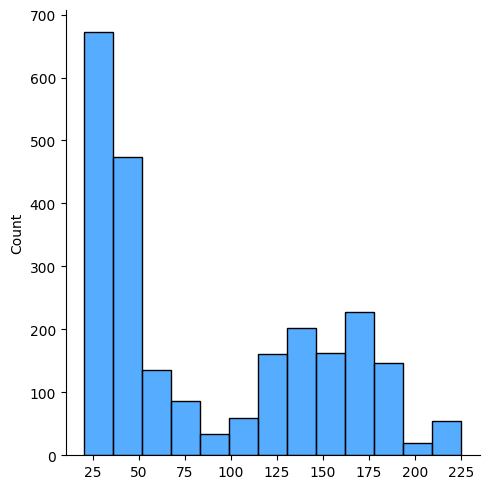

In [85]:
import seaborn as sns

sns.displot(final_list, color = 'dodgerblue')

In [ ]:
#convert pandas dataframe object to numpy array and sort
h = np.asarray(sample)
h = sorted(h)

In [87]:
#use the scipy stats module to fit a normal distribution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

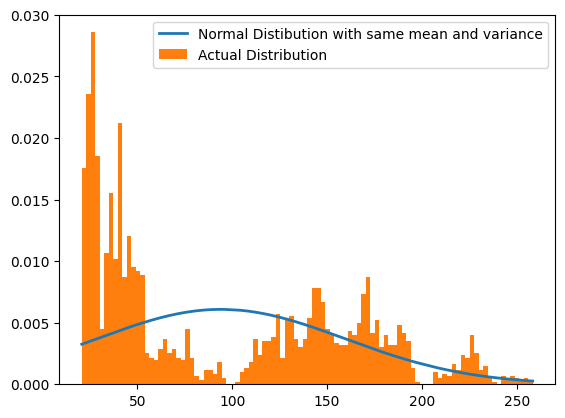

In [89]:
#plot both series on the histogram

plt.plot(h, fit, '-', linewidth = 2, label = 'Normal Distibution with same mean and variance')
plt.hist(h, density = True, bins = 100, label = 'Actual Distribution')
plt.legend()
plt.show()

In [91]:
#ordinary least square
from statsmodels.formula.api import ols

mlr = ols('Close ~ Open + High + Low + Volume', dataset).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.567e+06
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:47:58   Log-Likelihood:                -2659.1
No. Observations:                2516   AIC:                             5328.
Df Residuals:                    2511   BIC:                             5357.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0418      0.050      0.828      0.4